<a href="https://colab.research.google.com/github/MathewDanie1/cambridge_data_ml_coursework/blob/main/Anomaly_Detection_using_statistical_and_ML_approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Outline & Objectives

## Mini-project 5.3 Detecting the anomalous activity of a ship’s engine

In this immersive exploration into detecting the anomalous activity of a ship’s engine, you can practically apply the concepts you've learned over the past few weeks.

A poorly maintained ship engine in the supply chain industry can lead to inefficiencies, increased fuel consumption, higher risks of malfunctions, and potential safety hazards. Your challenge in this project is to apply critical thinking and ML concepts to design and implement a robust anomaly detection model.


<br></br>

## **Business context**
You are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As you work through this project, keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

Your task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, you’ll explore the data and:
- employ preprocessing and feature engineering
- perform model training, anomaly detection, post-processing, and refinement.

You must prepare a report illustrating your insights to the prospective stakeholders, showing how your solution will save the business money and build trust with its stakeholders. At this stage of the project, the main question you need to consider is:
- What insights can be gained from the data, and what recommendations can be made to the company based on these insights? For example, which features need to be monitored closely, and what are the thresholds for anomalous observations? Which statistical or ML technique is the best for anomaly detection based on **this data set**, and which feature (univariate approach) or combination of features (multivariate approach) can predict maintenance?

<br></br>

## **Objective**
By the end of this mini-project, you will be able to understand and apply statistical and ML methods for detecting anomalies.

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- apply statistical techniques to detect anomalies
- use ML algorithms to detect anomalies.

You will also write a report summarising the results of your findings and recommendations.

> Start your activity here. Select the pen from the toolbar to add your entry.

# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URL to import data set from GitHub.
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'
data = pd.read_csv(url)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


There are no missing values in the data. We will also check for duplicates:

In [ ]:
print(f'Number of duplicate rows: {data.duplicated().sum()}')

Number of duplicate rows: 0


We can begin to explore the data values. (first we standardise the column names to make subsequent analysis and presentation easier and more consistent)

In [ ]:
# tidy / standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')
print(data.shape)
data.head()

(19535, 6)


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


The data consists of 19,535 rows and 6 columns. All columns contain numerical, non-categorical values, which appear to be continuous. We will analyse this further by calling the describe function. We will add the 2.5th, 5th, 97.5th and 95th percentile to the results given we are looking to identify up to 5% of outliers.

In [ ]:
data.describe(percentiles=[.025,.05, .25,.75,.95, .975])

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
2.5%,410.000000,1.770263,2.288810,0.933321,73.859935,66.964454
5%,443.000000,1.941852,3.127162,1.084493,74.269140,68.401196
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
95%,1324.000000,5.058040,12.208475,4.438415,84.940778,88.612891


The columns have varying ranges of data, with means ranging from 2.3 to 791, meaning standardisation may be required before performing data analysis. The first few columns appear to have far wider spreads than 'lub oil temp' and 'coolant temp' but we will print out the coefficient of variation to compare the variability of observations within each columns on the same (percentage) scale:

In [ ]:
# print out coefficitent of variation for each column
for col in data.columns:
    cv = (data[col].std() / data[col].mean())*100
    cv = round(cv, 2)
    print(f'{col}: {cv}')

engine_rpm: 33.82
lub_oil_pressure: 30.92
fuel_pressure: 41.48
coolant_pressure: 44.38
lub_oil_temp: 4.01
coolant_temp: 7.91


This confirms that columns 'lub oil temp' and 'coolant temp' displays far lower dispersion around the mean.

Though 'Engine rpm' is rounded to whole numbers (and is set as type integer rather than float - seen below)- the wide range of values supports being treated as a continuous variable.

We will now look to glean more insight by visualising the data, first via boxplots for each column.

Due to the non-standardised nature of the dataset - i.e. the columns have means and IQRs distinct from each other prior to any standardisation which we may choose to do. We will initially plot each column on a separate subplot in order to be able to visualise each properly.

We will display the column mean value, as well as the median, 25th, 75th percentiles, IQR and IQR-method upper and lower whiskers, based on 1.5xIQR.

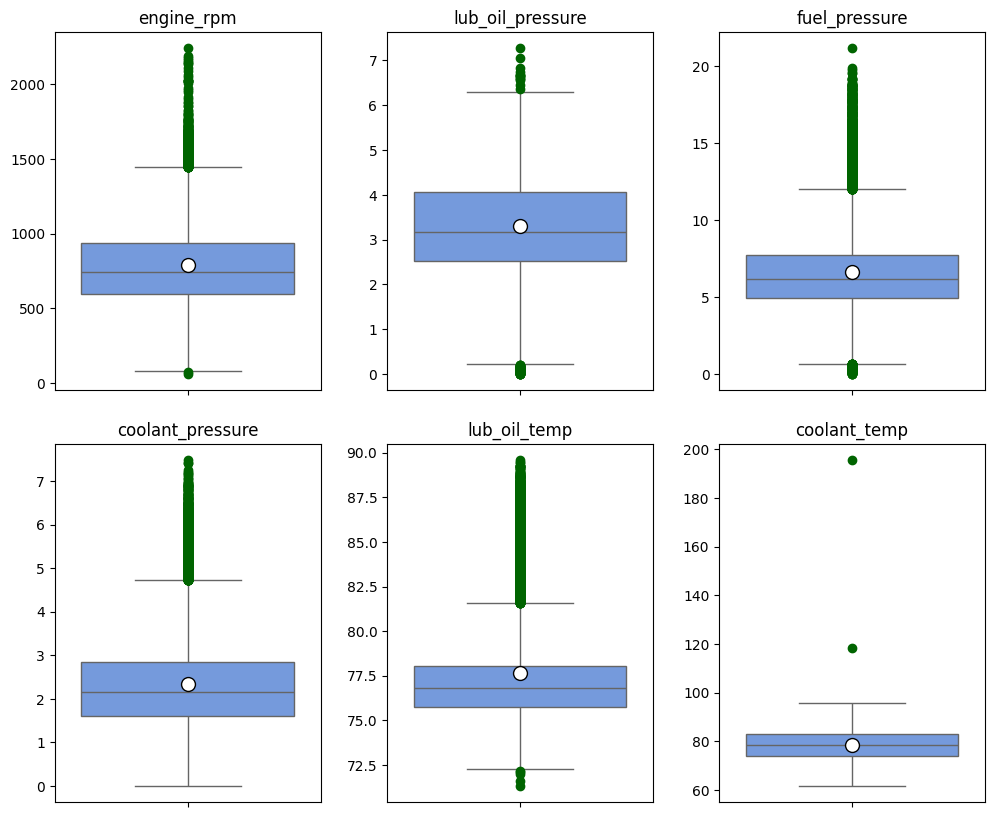

In [ ]:
cols = list(data.columns) #convert the column names to a list

# Determine the number of logging curves
num_cols = len(cols)

# Create a figure with 1 row, and num_cols long
fig, axs = plt.subplots(2, int(num_cols/2), figsize=(12,10))

# Use a for loop to loop over each column in the dataframe and
# create a separate box plot
for i, (ax, curve) in enumerate(zip(axs.flat, cols)):
    sns.boxplot(y=data[curve], ax=ax, color='cornflowerblue', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o',
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})

    ax.set_title(cols[i])
    ax.set_ylabel('')

plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()

Below we use the same approach to produce histograms, to further understand the distribution of the observations within each column.

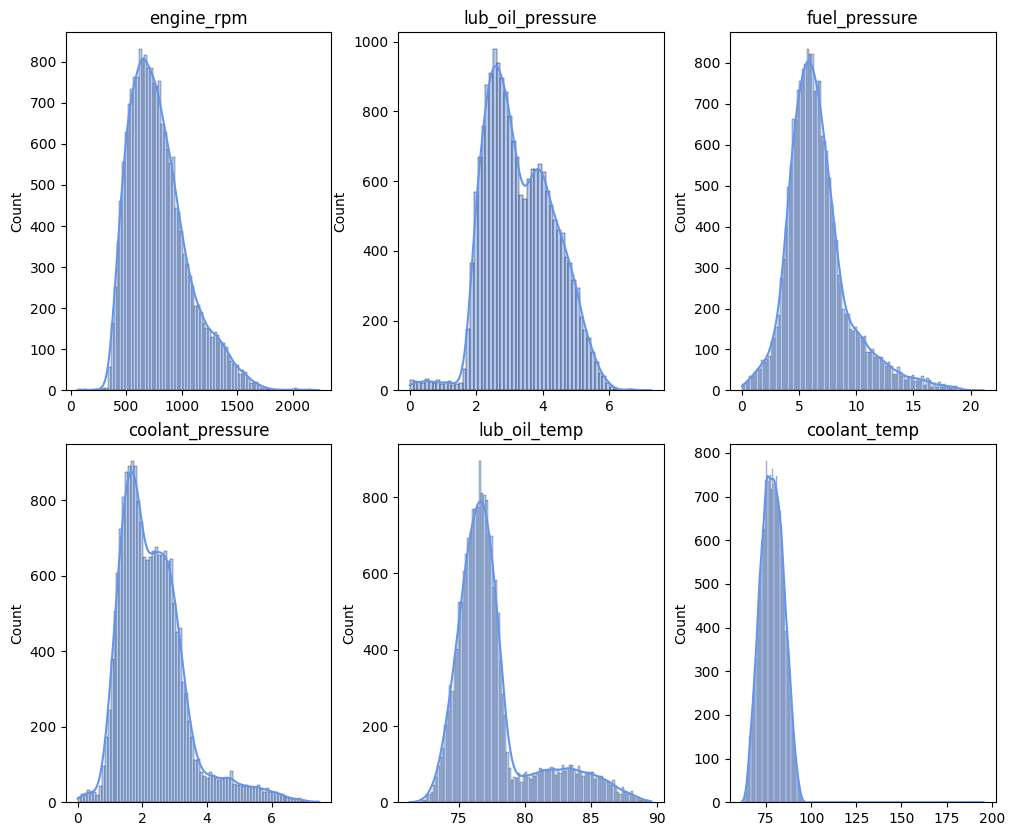

In [ ]:
cols = list(data.columns)
num_cols = len(cols)
fig, axs = plt.subplots(2, int(num_cols/2), figsize=(12,10))
for i, (ax, curve) in enumerate(zip(axs.flat, cols)):
    sns.histplot(x=data[curve], ax=ax, color='cornflowerblue', kde=True)
    ax.set_title(cols[i])
    ax.set_xlabel('')

plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()

The visualisations are interesting as they all columns are positively skewed and two columns - coolant_temp and coolant_pressure - have no outliers at the beyond the lower bound of the IQR (inter-quartile range). This is interesting as the business context suggests that outliers at the low and high end are relevant in all cases. As we are looking to detect up to 5% of anomalies, the temptation may have been to check the lower and upper 2.5 percentiles for each column and regard these as outlier. However this would not be appropriate based on the observation of the boxplots.

Another marked observation is that coolant_temp has very few, yet very significant, outliers. Given the business context suggests we need to consider outliers that occur in parallel with those of other columns, this may be worth considering during later analysis.

# Anomaly Detection - Statistical approach

We start our anomaly detection with the IQR statistical approach.

We will identify column outliers as those sitting either below 1.5xIQR below the upper-bound of the lower quartile (25th percentile), or above 1.5xIQR above the lower bound of the upper quartile (75th percentile). This will automatically take care of the anomaly skewness observed above.

We will add a new binary column for each existing column, the value for which will be 1 if the observation is categorised as an anomaly, and 0 if not. Finally we will add a column summing these anomalies for each row/observation, allowing us to identify the observations for which 2 or more anomalies are present - as indicated by the business context, and identify the 5% of observations in which most anomalies are present.


In [ ]:
# iterate through each column, calculating 25th & 75th percentile, the IQR and setting new binary column values:
for col in data.columns:
  sorted = data[col].sort_values()
  q1 = sorted.quantile(0.25)
  q3 = sorted.quantile(0.75)
  iqr = q3 - q1
  threshold = 1.5 * iqr
  lower_bound = q1 - threshold
  upper_bound = q3 + threshold
  new_col_name = col + '_outlier'
  data[new_col_name] = data[col].apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)

# Add column with value = sum of outliers
data['outlier_count'] = data.iloc[:, -6:].sum(axis=1)

data.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_rpm_outlier,lub_oil_pressure_outlier,fuel_pressure_outlier,coolant_pressure_outlier,lub_oil_temp_outlier,coolant_temp_outlier,outlier_count
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0


Now we are able to sort the outlier count:

In [ ]:
anomalies_sorted = data['outlier_count'].sort_values(ascending=False)
anomalies_sorted.head()

,outlier_count
10111,3
11395,3
5429,3
18318,3
5844,3


We see that there are 3 concurrent anomalies at most. In order to selecting up-to 5% of the observations as overall anomalies - i.e. those that truly reflect the ship's engine being in 'bad' status, we will take two different approaches, with a view to presenting both to the business expert for discussion.

The first will be to select the top 5% of observations with the highest counts of indivudual-feature anomalies. The second will be to consider all of those with 2 or more individual-feature anomalies, given we are told that all of these cases may present bad engine status, and sort these by another metric - for example, the cumulative degree of the anomalies present.

In [ ]:
# First approach
# caluclate 5% of data and gather the corresponsing observations from the dataframe after sortign by anomaly-count
five_pc = int(len(data)*0.05) # rounds down - given we seek 1-5%
print(f'The number of observations representing 5% of the data is: {five_pc}')

# find the 976th observation in the sorted column
anomaly_threshold_value = anomalies_sorted.iloc[975]
print(f'This implies categorising the following observations as anomalies: {anomalies_sorted.head(five_pc)}')

The number of observations representing 5% of the data is: 976
This implies categorising the following observations as anomalies: 10111    3
11395    3
5429     3
18318    3
5844     3
        ..
3554     1
16786    1
17040    1
16787    1
9162     1
Name: outlier_count, Length: 976, dtype: int64


**This result is interesting. It looks like by selecting 5%, we are counting cases where only 1 individual feature anomaly is present.**

In [ ]:
print(anomalies_sorted.iloc[975])

1


**Confirmed**.

We can therefore present all observations with 2 or more individual outliers as overall anomalies. No further refinement of this statistical approach will be necessary to obtain the number expected by the busniess stakeholders.

In [ ]:
# filter data by rows where outlier_count is 2 or more
data_filtered = data[data['outlier_count'] >= 2]
data_filtered.shape
final_anom_count_iqr = len(data_filtered)
final_anom_pc_iqr = round((final_anom_count_iqr/len(data))*100, 2)
print(f"""Using the IQR method we have detected {final_anom_count_iqr} observations where 2 or more features are outside of the expected range,
this represents {final_anom_pc_iqr}% of the total data points.""")

Using the IQR method we have detected 422 observations where 2 or more features are outside of the expected range,
this represents 2.16% of the total data points.


We therefore present the following observations from the data provided as anomalies:

In [ ]:
iqr_obs = data_filtered.index.values.tolist()

# Method prints a list with a new line after every specified number of items.
def print_list_with_newlines(my_list, items_per_line):
  for i, item in enumerate(my_list):
    print(item, end=',')
    if (i + 1) % items_per_line == 0:
      print()
print_list_with_newlines(iqr_obs, 25)
print("\n\n")
print(f"{len(iqr_obs)} observations in total identified as anomalies.")

113,122,131,144,148,157,160,249,260,313,315,421,444,478,549,601,632,634,653,685,729,757,773,845,871,
873,902,979,989,1037,1117,1136,1234,1283,1505,1526,1620,1672,1674,1703,1813,1859,1892,1921,1968,2031,2105,2162,2250,2298,
2302,2353,2429,2442,2468,2510,2517,2541,2619,2679,2727,2899,2940,2942,3027,3056,3063,3129,3250,3271,3407,3414,3517,3531,3696,
3794,3806,3818,3884,3962,4025,4128,4186,4383,4441,4459,4483,4488,4500,4526,4563,4615,4663,4785,4854,4914,5163,5178,5289,5308,
5329,5425,5429,5433,5445,5447,5550,5558,5581,5812,5824,5844,5846,5908,6062,6165,6254,6284,6294,6304,6427,6464,6505,6528,6553,
6559,6576,6587,6590,6667,6682,6703,6724,6733,6736,6742,6769,6953,6992,7017,7030,7034,7039,7140,7142,7177,7178,7218,7379,7459,
7472,7531,7544,7586,7593,7596,7634,7650,7656,7673,7676,7701,7753,7817,7824,7837,7857,7883,7912,7914,7981,8089,8111,8114,8125,
8170,8178,8241,8281,8385,8437,8447,8499,8520,8535,8579,8586,8804,8900,8987,9111,9152,9197,9291,9323,9325,9389,9412,9417,9487,
9548,9549,9566,9572,9



```
# This is formatted as code
```

**<u>IQR APPROACH CONCLUSION</u>**<br>Given that this results in 2.16% of cases being detected as anomalies, which falls within the range of 1-5% suggested by the business expert. We can conclude that the IQR-based approach selected provides a valid anomaly-detection model.<br><br>The IQR method is useful in this context, especially as we applied it to the individual columns - meaning no prior scaling was needed, and given that many of the columns exhibited skews, which is taken care of by only counting observations beyond the upper OR lower bounds.<br><br>The one thing we have not considered with this approach - as indicated previously - is the degree of the individual outliers, which may well be relevant to detecting the severity of true engine status issues/anomalies.

# Anomaly Detection - Machine Learing approach

In [ ]:
# first drop columns added during iqr
data = data.iloc[:, 0:6]
print(data.shape)
data.head()

(19535, 6)


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


We will now seek to identify anomalies using two separate, unsupervised machine learning techniques: One-class SVM and Isolation Forest.

### Apply One-class SVM

#### Feature Scaling

Unlike the IQR approach, this approach can handle higher-dimensionality and thus analyse the observations' feature values in totality. This can result in models being biased towards features with larger values. We therefore must first scale the data.

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_data = minmax_scale(data, axis=0)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp
0,0.285124,0.328864,0.218310,0.380751,0.271126,0.061345
1,0.249770,0.752321,0.303815,0.765787,0.104098,0.098868
2,0.274105,0.472427,0.174009,0.224214,0.918347,0.127239
3,0.315886,0.287968,0.336773,0.218992,0.347210,0.154745
4,0.282369,0.486747,0.281677,0.431092,0.213835,0.040939


We will apply the One-class SVM model to the dataset, adjusting the gamma nd nu values until we detect anomalies that fall within the expected range. (The rbf kernel funciton is used as standard in SVM.<br><br>We will begin by using using gamma of 0.5 and nu of 0.05

In [ ]:
# first import model
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.05)
model.fit(scaled_df)

# Predict the class (normal or anomaly) and add column with resulting value.
y_pred = model.predict(scaled_df)
scaled_df['anomaly'] = y_pred
svm_anomalies_5pc = y_pred

# Convert the predictions to a DataFrame.
anomalies = scaled_df[scaled_df.anomaly == -1]

# View output.
print(anomalies.shape)

# UNCOMMENT BELOW TO VIEW ALL 975 ANOMALY OBSERVATIONS IDENTIFIED
# print_list_with_newlines(anomalies.index.values.tolist(), 20)

(975, 7)


Remarkably our first attempt has detected 975 anomalies - just within the 5% (976) upper bound of expected anomalies. The model used therefore may be appropriate. Howver, for comparison, let's also find a One-class SVM model that identifies 1% of observations as anomalies and visualise the two models.

In [ ]:
# first print out what number of anomalies represents 1% of the data
print(f'The number of observations representing 1% of the data is: {int(len(data)*0.01)}')


scaled_data_1 = minmax_scale(data, axis=0)
scaled_df_1 = pd.DataFrame(scaled_data_1, columns=data.columns)
scaled_df_1.head()

# to identify fewer anomalies we can reduce gamma and/or reduce nu
model_1 = OneClassSVM(kernel='rbf', gamma=0.11, nu=0.01)
model_1.fit(scaled_df_1)

# # Predict the class (normal or anomaly) and add column with resulting value.
y_pred_1 = model_1.predict(scaled_df_1)
scaled_df_1['anomaly'] = y_pred_1

# # Convert the predictions to a DataFrame.
anomalies_1 = scaled_df_1[scaled_df_1.anomaly == -1]

# # View output.
print(anomalies_1.shape)
print_list_with_newlines(anomalies_1.index.values.tolist(), 20)

The number of observations representing 1% of the data is: 195
(196, 7)
1,9,144,157,249,291,465,549,553,561,683,771,865,912,929,1335,1519,1558,1685,1807,
2070,2073,2250,2275,2295,2298,2302,2308,2504,2649,2669,2690,2727,2790,2823,2902,2940,3044,3129,3186,
3202,3292,3374,3529,3625,3696,3701,3794,3822,3890,4375,4442,4445,4500,4643,4709,4742,4793,4947,5215,
5433,5581,5859,5970,6006,6253,6604,6650,6955,7034,7039,7169,7177,7229,7368,7415,7448,7490,7572,7705,
7744,7753,7790,7928,7935,7981,8019,8171,8252,8620,8663,8681,8865,8906,8926,9063,9148,9187,9275,9276,
9389,9417,9548,9818,9891,9934,9997,10065,10091,10103,10197,10473,10506,10566,10589,10663,11053,11205,11325,11395,
11469,11672,11750,11846,11900,11941,11943,11978,12129,12215,12553,12698,12785,12799,12873,13179,13191,13366,13433,13438,
13496,13750,13756,13909,13910,13930,14380,14425,14564,14585,14601,14684,14857,14921,14955,14969,15030,15045,15450,15549,
15759,15805,15932,16063,16073,16152,16329,16514,16554,16583,16807,16956,17068,17087,17

We now have two One-class SVM models that identify 1% and 5% of the observations as anpmalies. Clearly there are infinite combinations of gamma and nu that we could try to get a number of anomalies that falls within this range. A higher gamma risks overfitting the model to the training data, whilst a higher nu value might lead to more incorrectly identified anomalies (false positives).
<br><br> We will now visualise the result of both models for comparison by calling a reusable function. First, we must perform dimensionality reduction - using PCA (principal component analysis) -  in order to visualise the 6 feature model in 2-D.

In [ ]:
scaled_df = scaled_df.drop(columns=['anomaly'])
scaled_df_1 = scaled_df_1.drop(columns=['anomaly'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

In [ ]:
# Visualise the data
def plot_model(gamma, nu, X_scaled, title):
    # set model
    model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
    model.fit(X_scaled)
    # Create a grid for plotting decision boundaries and anomaly detection.
    xx, yy = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict whether each point is an inlier (1) or an outlier (-1).
    y_pred = model.predict(X_scaled)

    # Plot setup.
    plt.figure(figsize=(12, 8))
    plt.title(title)

    # Plot the decision function levels and decision boundary.
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')  # Decision boundary
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)  # Anomaly regions
    # Plot also the data points, using different markers for normals and anomalies.
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=np.where(y_pred == 1, 'Normal', 'Anomaly'),
                    style=np.where(y_pred == -1, 'Anomaly', 'Normal'), markers={'Anomaly': 'X', 'Normal': 'o'},
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'}, alpha=0.7, edgecolor='k')
    # Plot aesthetics.
    plt.axis('tight')
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    print(f"{len(X_scaled)} total observations.")
    anomaly_count = np.sum(y_pred == -1)
    print(f"Anomaly count: {anomaly_count}")

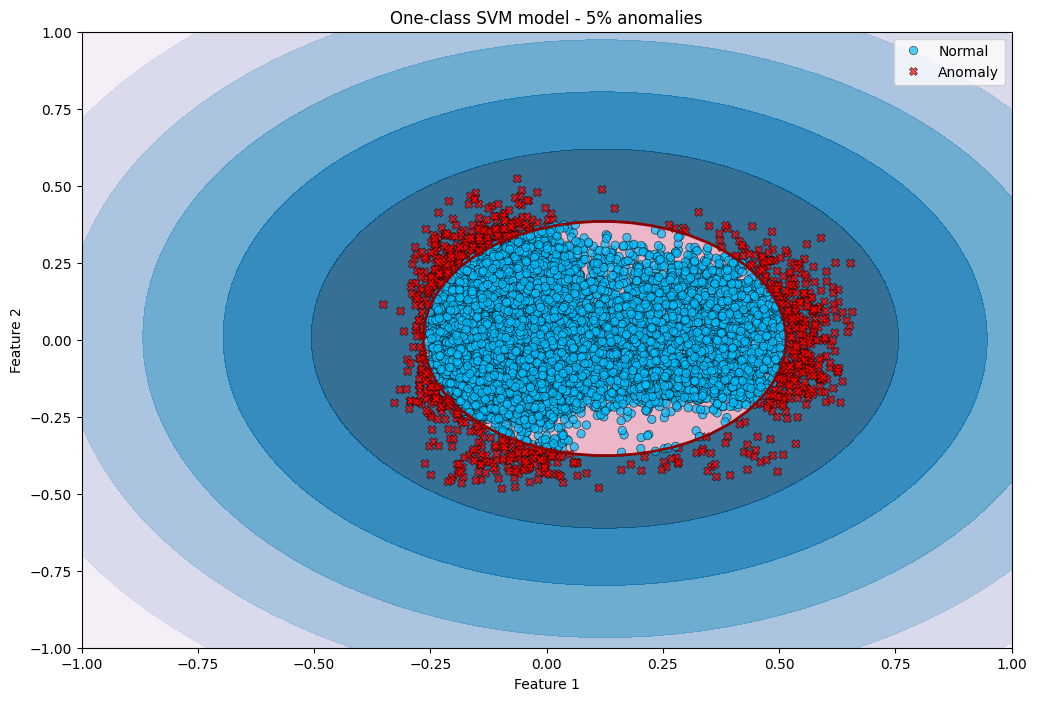

19535 total observations.
Anomaly count: 977


In [ ]:
# Visualise the more anomaly-sensitive model (that which flagged 5% of the current training data as anomalies)
plot_model(0.5, 0.05, pca_df, 'One-class SVM model - 5% anomalies')

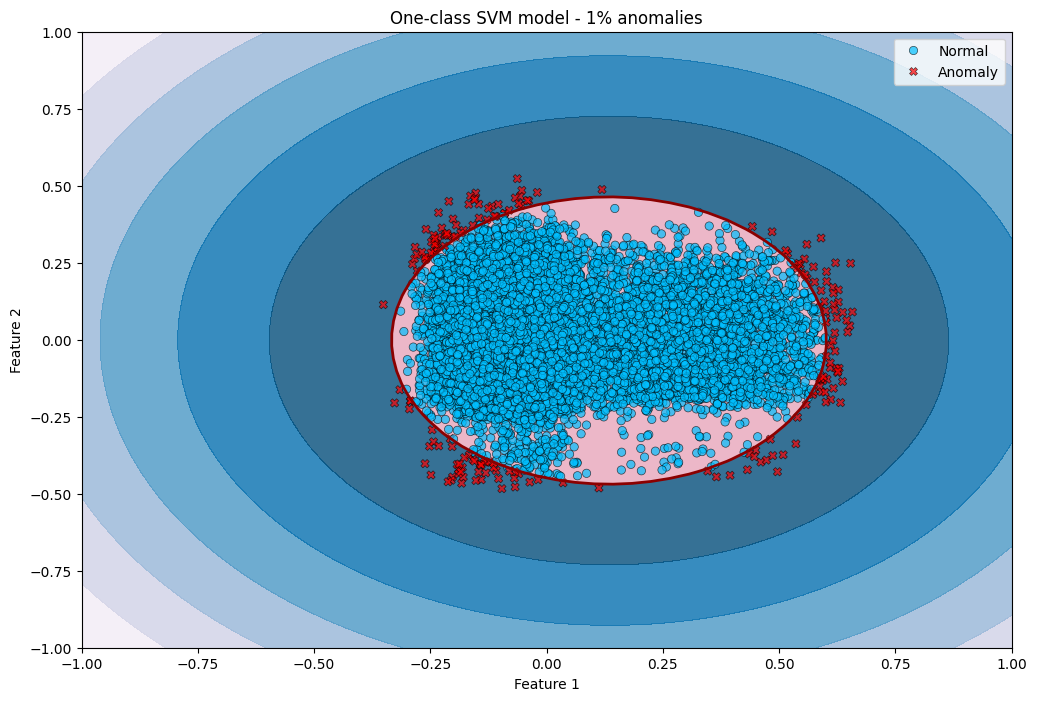

19535 total observations.
Anomaly count: 197


In [ ]:
# Visualise the less anomaly-sensitive model (that which flagged 1% of the current training data as anomalies)
plot_model(0.11, 0.01, pca_df, 'One-class SVM model - 1% anomalies')

The visualisations allow us to see the amount, and scale of the outliers, as well as giving an idea of the replicability of the model - by way of an illustration of the decision boundary'. Given the images are demonstrating the data in reduced dimensionality, it is not a perfect representation. Hence the very slight difference in anomaly count.We can see that, even when identifying 5% of observations as anomalies - there are a number of observations that appear detached from the 'cluster' of observations - we might ask the business expert therefore whether our anomaly detection system may want to be even more sensitive than 5%? This conversation would be supported with the data points in question - for which we could generate a similar diagram with the indexes available on hover, for example. <br><br>It was also dicsovered while experimenting with the visualisations that changes in the Gamma value has very little impact on the number of anomalies identified, whereas sensitivity to nu is very high.<br><br>**Note that the decision boundaries look suspiciously perfect/spherical here for both models, which limits the usefulness of the visualisation. If correct it suggests that the model is certainly not being overfitted to the current dataset. However, I am not sure if I should have somehow applied the original (6-feature) model to the 2D data rather than re-applying the model to the reduced-dimension 2-d dataframe - though even if this is possible, I could not get past an error which said: "X has 2 features, but OneClassSVM is expecting 6 features as input". Intuitively I think applying the model parameters to the 2D dataset for visualisation makes sense and so we will conclude the SVM analysis here with a view to discussing fiundings with the business expert. We will however compare the findings of the model with that of the others at the end.**

### Apply Isolation Forest approach

Isolation Forest is a commonly used anomaly detection approach within unsupervised learning, and is especially effective with high dimensional data; as a tree-based method, it does not need a scaled dataset to be effective. We therefore work with the pre-scaled data. As we are treating the whole dataset provided as a training set for future anomaly detection, we do not need to seta random state. We will set the contamination to 0.05 given that that should identify 5% of the data as anomalies. <br><br>Given this is the third approach adopted, our goal is to obtain 5% so that we can compare this upper bound of anomalies across the 3 approaches and hope for a number of commonly-identified observations which fall between 1-5% of the observations.

In [ ]:
# first confirm original dataset is unchanged
print(data.shape)
data.head()

(19535, 6)


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05)
iso_forest.fit(data)

IsolationForest(contamination=0.05)

In [ ]:
# apply model to identify anomalies
y_pred = iso_forest.predict(data)
data['anomaly'] = y_pred
print(f'Number of anomalies detected: {len(data[data["anomaly"] == -1])}')
print("5% of data == {}".format(int(len(data)*0.05)))

Number of anomalies detected: 977
5% of data == 976


In [ ]:
# adjust contamination slightly to hit target anomaly count
iso_forest_1 = IsolationForest(n_estimators=100, contamination=0.04995)
iso_forest_1.fit(data)
y_pred = iso_forest_1.predict(data)
data['anomaly_1'] = y_pred
print(f'Number of anomalies detected: {len(data[data["anomaly_1"] == -1])}')
print("5% of data == {}".format(int(len(data)*0.05)))

Number of anomalies detected: 976
5% of data == 976


We now have the desired number identified. We will set one anomaly column to represent those found with 0.04995 contamination as anomalies.

In [ ]:
data['anomaly_isoforest'] = data['anomaly_1']
data.drop(columns=['anomaly', 'anomaly_1'], inplace=True)
data.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,anomaly_isoforest
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,1
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,-1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,1
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,1


To visualise the data, we will append the list of anomalies detected to the 2D dataset.

In [ ]:
pca_df = pd.DataFrame(pca_df)
pca_df['anomaly_isoforest'] = data['anomaly_isoforest']
pca_df.head()

,0,1,anomaly_isoforest
0,-0.076134,-0.155337,1
1,-0.278247,0.223148,-1
2,0.575344,-0.001137,1
3,0.007560,-0.147480,1
4,-0.143010,0.005024,1


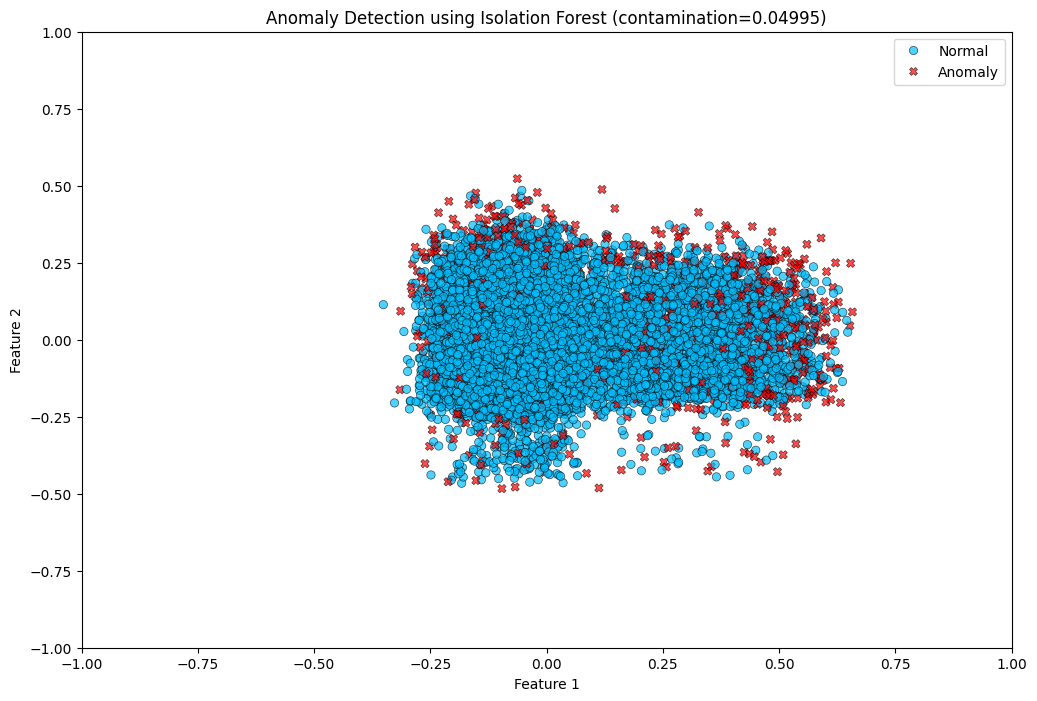

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Anomaly Detection using Isolation Forest (contamination=0.04995)")
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=np.where(pca_df['anomaly_isoforest'] == 1, 'Normal', 'Anomaly'),
                    style=np.where(pca_df['anomaly_isoforest'] == -1, 'Anomaly', 'Normal'), markers={'Anomaly': 'X', 'Normal': 'o'},
                    palette={'Normal': 'deepskyblue', 'Anomaly': 'red'}, alpha=0.7, edgecolor='k')
plt.axis('tight')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

We see that more outliers appear to have been identified in the 'centre' of the 2D representation when compared with the OCSVM approach. This is likely due to the ability of Isolation Forest to consider the original dataset's unscaled features and therefore supports out use of this approach to bolster our anomaly detection approach.

It would be helpful to see the observation index for all anomalies so that we can delve further into the data for each to understand what is happening at the full dimensionality, but there are too many anomalies for this to be practical or useful. The images still give a helpful reference point for discussions with the business expert. We observe for example that there are few, if any, very significant outliers, and that many non-outliers - according to this model - appear to be very close to those identified as outliers. While this may be due to potentially misleading 2D representation, it is worth exploring these observations and considering whether our system for flagging anomalies may benefit from being more sensitive as a result. Once again this would be discussed with the business expert.

**<u>ML APPROACH CONCLUSION</u>**<br>We have generated anomaly detection models using two unsupervised ML approaches and have generated some useful visualisations of their results to support the ongoing conversation with the business expert.
<br><br>
Given that we now have used 3 approaches, it will be interesting to see which observations are commonly identified as anomalies across all 3 (using the upper bound of 5% in each ML case). This would give us confidence in the predictions. Should the number of common observations fall within the suggested range of 1-5% of observations, we might suggest this robust approach of using all 3 for the company's future anomaly detection. Clearly we would have to consider the computing and financial resource requirements, based on the expected amount of future data analysis.

#Conclusion - combinging the approaches

## Comparing the 3 approaches

Given that the original business context (ahead of our next meeting with the business stakeholders) states the follwing: <br><i>"the business context suggests that anomalies should be flagged when certain combinations of features occur simultaneously.</i><br>
Our IQR approach only considered those cases where 2 or more features were flagged as anomalies - giving us 422 identified anomalies. Our analysis of individual feature anomaly at this stage has not been sophisticated enough to order those cases to arrive at a 5% upper bound. If the business stakeholders were to confirm that one-feature anomalies should also be considered we will seek to order these by the scale of the respective outliers.<br><br>
However, for now, we will include the 422 anomalies from our IQR model and the upper bound amounts of 975 (OCSVM) and 976 (Isolation forest) from our Machine Learning approaches.

In [ ]:
data['anomaly_iqr'] = data.index.isin(data_filtered.index.values.tolist())
data["anomaly_iqr"] = data["anomaly_iqr"].astype(int)
data['anomaly_isoforest'].replace({1: 0, -1: 1}, inplace = True)
data.head()
data['anomaly_svm'] = svm_anomalies_5pc
data['anomaly_svm'].replace({-1: 1, 1: 0}, inplace = True)

# print count of -1 values in iso_forest
print(f'Number of anomalies detected by Isolation Forest: {len(data[data["anomaly_isoforest"] == 1])}')
print(f'Number of anomalies detected by One-class SVM: {len(data[data["anomaly_svm"] == 1])}')
print(f'Number of anomalies detected by IQR: {len(data[data["anomaly_iqr"] == 1])}')
data.head()

Number of anomalies detected by Isolation Forest: 976
Number of anomalies detected by One-class SVM: 975
Number of anomalies detected by IQR: 422


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,anomaly_isoforest,anomaly_iqr,anomaly_svm
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,1,0,1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0


In [ ]:
# Add column that totals the number of times observation was identified across all 3
data['anomaly_count'] = data['anomaly_isoforest'] + data['anomaly_svm'] + data['anomaly_iqr']

#print value counts of anomaly count column
print(data['anomaly_count'].value_counts())
data.head()

anomaly_count
0    18035
1      822
2      483
3      195
Name: count, dtype: int64


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,anomaly_isoforest,anomaly_iqr,anomaly_svm,anomaly_count
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,1,0,1,2
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,1,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0


In [ ]:
pca_df.drop(columns=['anomaly_isoforest'], inplace=True)

In [ ]:
pca_df['anomaly_count'] = data['anomaly_count']
eq1_anoms = pca_df[pca_df['anomaly_count'] > 0]
gt2_anoms = len(pca_df[pca_df['anomaly_count']>1])
eq3_anoms = len(pca_df[pca_df['anomaly_count']>2])
print(f'total observations identified at least once as anomalies is {len(eq1_anoms)}, representing {round((len(eq1_anoms)/len(data))*100, 2)}% of the data.')
print(f'total observations identified at least twice as anomalies is {gt2_anoms}, representing {round((gt2_anoms/len(data))*100, 2)}% of the data.')
print(f'total observations identified at least twice as anomalies is {eq3_anoms}, representing {round((eq3_anoms/len(data))*100, 2)}% of the data.')

total observations identified at least once as anomalies is 1500, representing 7.68% of the data.
total observations identified at least twice as anomalies is 678, representing 3.47% of the data.
total observations identified at least twice as anomalies is 195, representing 1.0% of the data.


Visualise all anomalies identified - highlighting those identified by multiple models:

In [ ]:
pca_df.head()

,0,1,anomaly_count
0,-0.076134,-0.155337,0
1,-0.278247,0.223148,2
2,0.575344,-0.001137,1
3,0.007560,-0.147480,0
4,-0.143010,0.005024,0


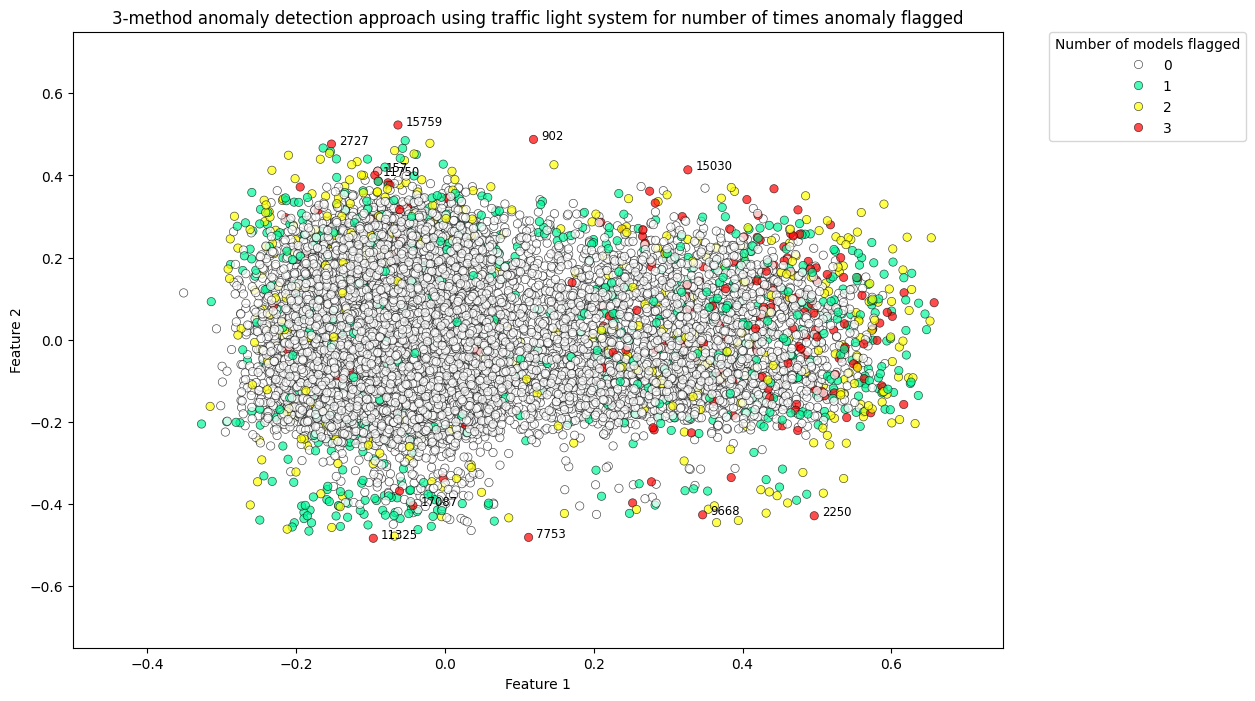

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=pca_df, x=0, y=1, hue="anomaly_count",
                palette={0: 'white', 1: 'mediumspringgreen', 2: 'yellow', 3: 'r'}, alpha=0.7, edgecolor='k')
plt.title("3-method anomaly detection approach using traffic light system for number of times anomaly flagged")
plt.axis('tight')
plt.xlim((-0.5, 0.75))
plt.ylim((-0.75, 0.75))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Number of models flagged", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


for line in range(0,pca_df.shape[0]):
    if pca_df.iloc[line]["anomaly_count"] == 3 and (pca_df.iloc[line][1]>0.4 or pca_df.iloc[line][1]<-0.4):
      ax.text(pca_df[0][line]+0.01, pca_df[1][line],
      pca_df.index[line], horizontalalignment='left',
      size='small', color='black', weight='light')

plt.show()

We find that 7.56%, 3.47% and 1.0% of the data are identified as anomalies by at least 1, 2 or all-3 models respectively. We might suggest that we use a traffic-light warning system to the business stakeholders, such that they can introduce procedures with increasing degrees of urgency when the features montitored are flagged - based on how many of our models have identified an anomaly.
Clearly this requires further conversations with the business experts, to facilitate this we have highlighted some of the 'red-flag' anomalies, or those identified by all-3 models, for conversation. The goal would be to have some 'on-hover' funcitonality ready ahead of the meeting in order to be able to observe and discuss all observations flagged, or not flagged, as represented in the visualisations.

#Reflection
As detailed in the text boxes above, I have adopted 3 separate methods to analyse the data and concluded with an approach that uses all-three. I am pleased that this can offer the business experts an anomaly-detection system that enables them to detect anomalies with varying degrees of threat-level, and that they can therefore implement measures and procedures corresponding to each.

The visualisations generated, whilst limited due to their 2D representation of higher-dimension data, will be useful to facilitate further conversations with the business. Given the dataset provided is for existing/historical observations, a next step may be to ask the business for a list of which they truly consider to have been anomalies. We can therefore test our models further, and refine our detection system by training some supervised ML approaches in addition to those adopted thus far.